<h1> Monthly Modeling </h1>

In [2]:
import numpy as np
import pandas as pd

<h2> Data Cleaning and Scaling </h2>

In [3]:
monthly = pd.read_csv('../data/monthly_stocks.csv')

In [4]:
monthly.head()

,Unnamed: 0,name,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,Symbol,IPO Year,Sector,Industry
0,0,AA,36.586307,32.068035,33.519238,34.011032,28.848015,26.830041,25.824240,26.027767,...,7.310452,8.00770,11.388864,12.292545,14.796071,13.359175,AA,2016.0,Basic Industries,Metal Fabrications
1,1,AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AAC,2021.0,Finance,Business Services
2,2,AACG,4.270263,3.562632,3.982609,3.667143,3.422000,3.309318,2.974286,2.977955,...,0.827619,0.79375,1.076591,1.354318,1.173333,1.097250,AACG,NaN,Miscellaneous,Service to the Health Industry
3,3,AACI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AACI,2021.0,NaN,NaN
4,4,AACIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AACIU,2021.0,NaN,NaN


In [5]:
monthly = monthly.drop(columns='Unnamed: 0')

In [6]:
monthly = monthly.fillna(0)

In [7]:
### Using the standard Scalar

transformed_monthly = monthly
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


transformed_monthly.iloc[:,1:-4] = scaler.fit_transform(transformed_monthly.iloc[:,1:-4].to_numpy())
# print(monthly)

In [8]:
transformed_monthly = transformed_monthly.drop(columns=['IPO Year'])

In [9]:
transformed_monthly.head()

,name,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,Symbol,Sector,Industry
0,AA,-0.011076,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,...,-0.156564,-0.168602,-0.169426,-0.143685,-0.135565,-0.116058,-0.129804,AA,Basic Industries,Metal Fabrications
1,AAC,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,...,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886,AAC,Finance,Business Services
2,AACG,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,...,-0.256505,-0.253408,-0.257444,-0.262759,-0.256506,-0.257096,-0.258380,AACG,Miscellaneous,Service to the Health Industry
3,AACI,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,...,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886,AACI,0,0
4,AACIU,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,...,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886,AACIU,0,0


In [10]:
sparse = transformed_monthly.drop(columns= ['Symbol','Sector','Industry', 'name'])

 <h2> PCA Analysis </h2>       

In [11]:
from sklearn.decomposition import PCA
components = 4

pca = PCA(n_components=components)
pca.fit(sparse)
sparse_t = pca.transform(sparse)



In [12]:
sum(pca.explained_variance_ratio_)

0.9953945984806305

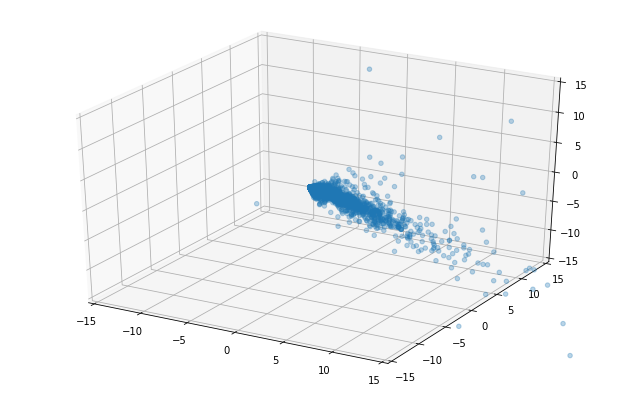

In [13]:
import matplotlib.pyplot as plt
pca_a = pd.DataFrame(sparse_t)
pca_a
fig = plt.figure(figsize = (11,7))
ax = fig.add_subplot(111, projection = '3d')

x = pca_a.iloc[:, 1]
y = pca_a.iloc[:, 3]
z = pca_a.iloc[:, 2]
ax.set_zlim3d(-15, 15)                    # viewrange for z-axis should be [-4,4] 
ax.set_ylim3d(-15, 15)                    # viewrange for y-axis should be [-2,2] 
ax.set_xlim3d(-15, 15)                    # viewrange for x-axis should be [-2,2] 
ax.scatter(x, y, z)

In [14]:
pca_a.shape

(8155, 4)

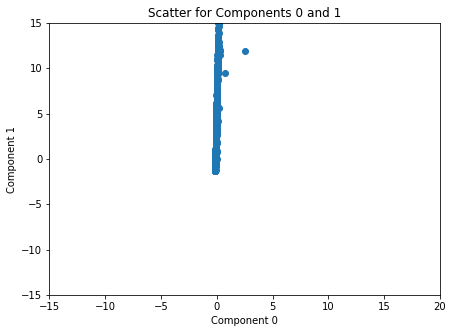

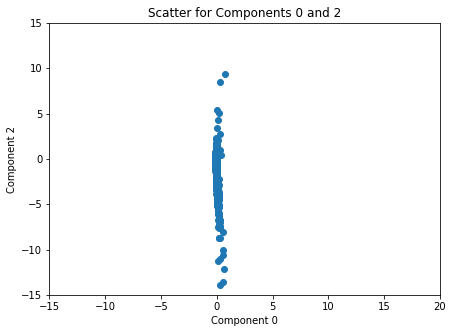

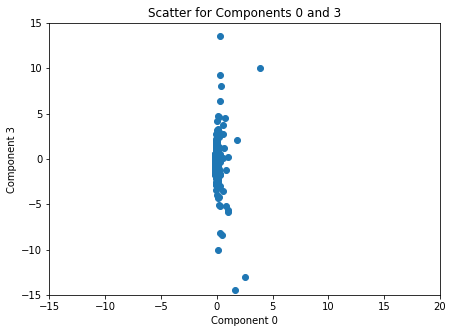

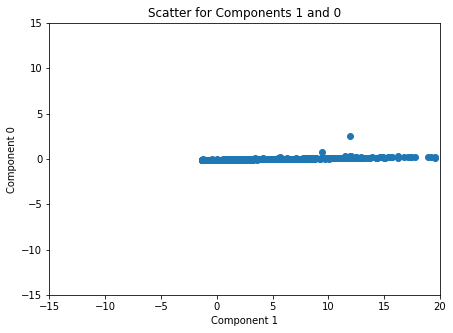

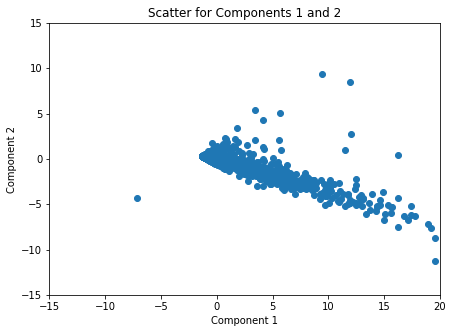

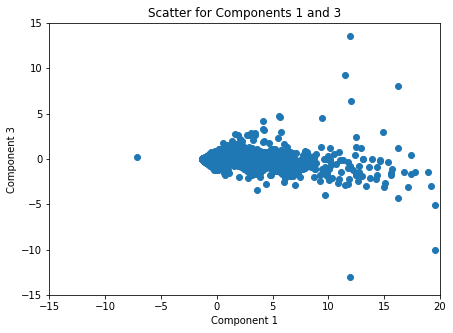

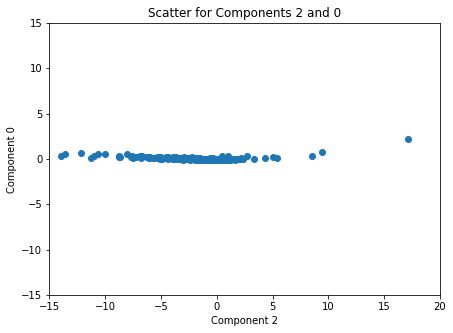

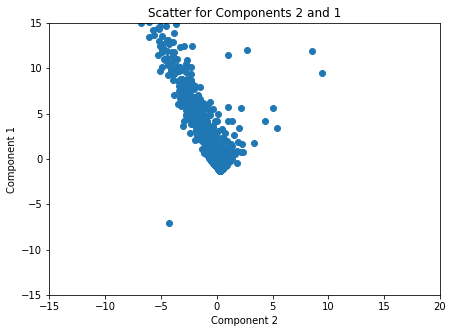

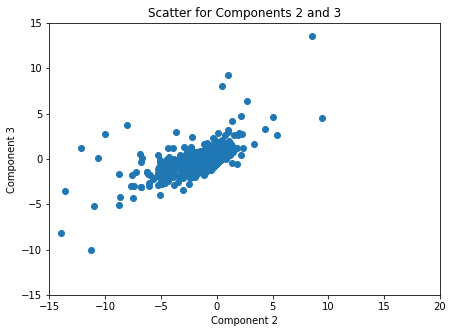

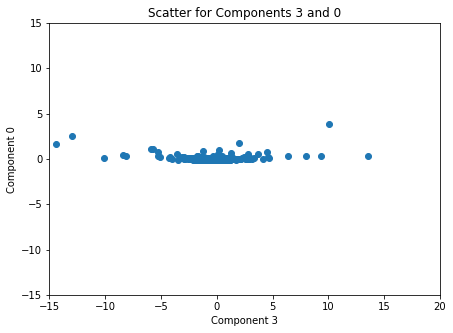

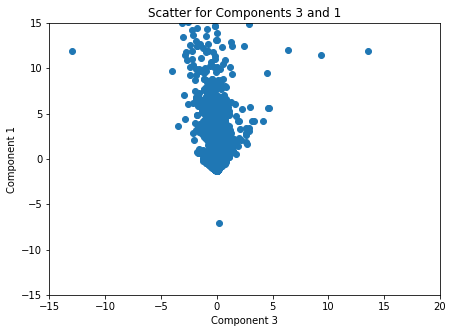

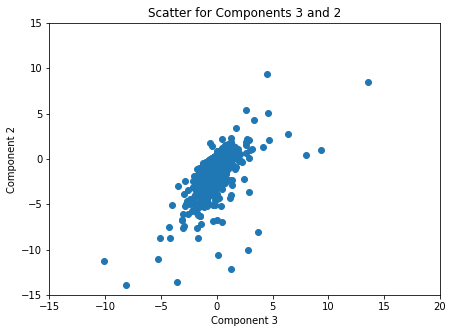

In [15]:

pca_a = pd.DataFrame(sparse_t)
for n in range(4):
    for j in range(4):
        if n != j:
            fig = plt.figure(figsize = (7,5))
            ax = fig.add_subplot(111)
            x = pca_a.iloc[:, n]
            y = pca_a.iloc[:, j]
            ax.set_xlabel(f"Component {n}")
            ax.set_ylabel(f"Component {j}")
            ax.set_title(f'Scatter for Components {n} and {j}')
            ax.set_ylim(-15, 15)                    # viewrange for y-axis should be [-2,2] 
            ax.set_xlim(-15, 20)
            ax.scatter(x, y)
            plt.show()   

In [16]:
#### K means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
### Should be using k 2

df = pd.DataFrame(sparse)
labels = []

for clusters in range(2, 5): 
    
    kmeans = KMeans(n_clusters=clusters)
    label = kmeans.fit_predict(df)
    labels.append(label)


In [90]:
#### K means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
### Should be using k 2


    
kmeans = KMeans(n_clusters=20)
label = kmeans.fit_predict(df)


In [91]:
print(label)

[5 0 5 ... 9 5 5]


In [18]:
calinski_harabasz_score(df, label)

22821.22529046592

<h2> GMM </h2>

In [19]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

## We know the 5 components serves us the best
sklearn_pca = PCA(n_components = 5)
Y_sklearn = sklearn_pca.fit_transform(sparse)

predictions = []

for cluster in range(2,5):
    print(cluster)
    gmm = GaussianMixture(n_components=cluster, init_params='random').fit(Y_sklearn)
    prediction_gmm = gmm.predict(Y_sklearn)
    predictions.append(prediction_gmm)

2
3
4


In [20]:
for i in range(len(predictions)):

    score = silhouette_score(sparse, predictions[i], metric =   'euclidean')
    
    print(f'Score for Cluster {i+2}: {score}')

Score for Cluster 2: 0.07192622240794323
Score for Cluster 3: 0.36059460375791885
Score for Cluster 4: 0.5779419281071325


In [21]:
calinski_harabasz_score(sparse, prediction_gmm)

807.7261407369041

It seems that the GMM has a much higher SH score and a higher silhoutte score. 

In [22]:
sparse.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,-0.011076,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,-0.011084,...,-0.049399,-0.084265,-0.113643,-0.156564,-0.168602,-0.169426,-0.143685,-0.135565,-0.116058,-0.129804
1,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,-0.011084,...,-0.276299,-0.278072,-0.278654,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886
2,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,-0.011084,...,-0.259510,-0.262821,-0.266381,-0.256505,-0.253408,-0.257444,-0.262759,-0.256506,-0.257096,-0.258380
3,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,-0.011084,...,-0.276299,-0.278072,-0.278654,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886
4,-0.011077,-0.011076,-0.011077,-0.011078,-0.01108,-0.011081,-0.011083,-0.011082,-0.011082,-0.011084,...,-0.276299,-0.278072,-0.278654,-0.269046,-0.264235,-0.267128,-0.275190,-0.271481,-0.269243,-0.269886


<h2> Clustering Analysis </h2>

It seems that from 2 - 4 clusters we have better results for 2 clusters and then declining to 4. However, checking this against our time series modeling is very important. The labeling of each should be saved and then compared. 

<h2> Time Series Modeling TSLearn </h2>

In [72]:
## We will be using the 2 clusters


df['label'] = labels[0]

In [73]:
df['label'].unique()

array([0, 1], dtype=int32)

In [74]:
ones = df[df['label'] == 1]
ones = ones.drop(columns=['label'])
zeros = df[df['label'] == 0]
zeros = zeros.drop(columns=['label'])

In [75]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import cdist_dtw
from tslearn.clustering import silhouette_score

import seaborn as sns




    
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(zeros)

score = silhouette_score(zeros, y_pred, metric="euclidean")

print(f'This is the silhoutte score: {score}')

dtws = dtw_score(zeros, y_pred)

print(f'DTW SCORE {dtws}')

plt.figure()
# plt.style.use('dark_background')
for yi in range(3):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in zeros[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
plt.show()

Resumed because of empty cluster
Resumed because of empty cluster
0.022 --> 0.021 --> 0.020 --> 0.019 --> 0.019 --> 0.018 --> 0.018 --> 0.018 --> 
This is the silhoutte score: 0.541928032920761


NameError: name 'dtw_score' is not defined

In [82]:
# df = df.drop(columns=['labels'])
from tslearn.metrics import cdist_dtw as dtw_score
df['4_labels'] = labels[2]

ones = df[df['4_labels'] == 1]
ones = ones.drop(columns=['4_labels'])
zeros = df[df['4_labels'] == 0]
zeros = zeros.drop(columns=['4_labels'])
twos = df[df['4_labels'] == 2]
twos = twos.drop(columns=['4_labels'])

threes = df[df['4_labels'] == 3]
threes = threes.drop(columns=['4_labels'])

In [83]:
labels

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32)]

0.020 --> 0.019 --> 0.019 --> 
s score 0.5135930204627046
DTW SCORE [[142.87854202]
 [208.89193088]
 [142.88318897]
 ...
 [142.87905316]
 [142.88103357]
 [142.88022252]]


<Figure size 432x288 with 0 Axes>

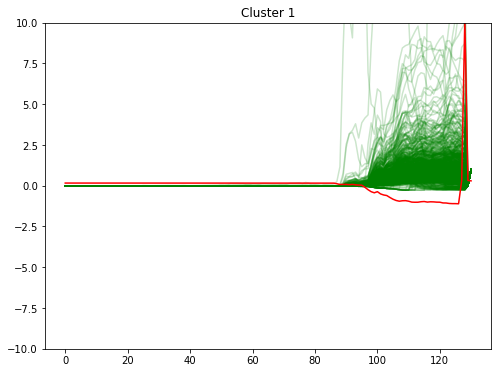

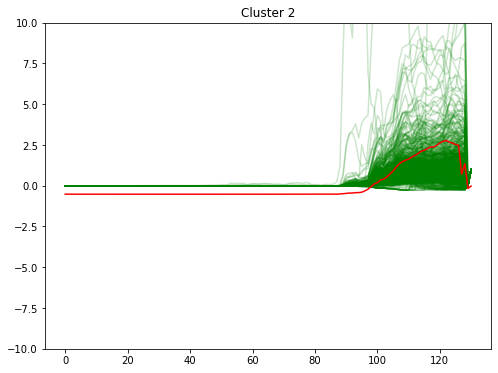

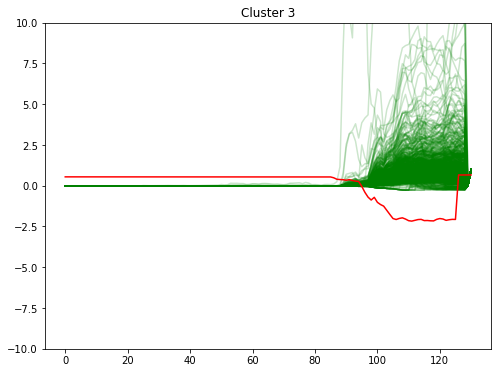

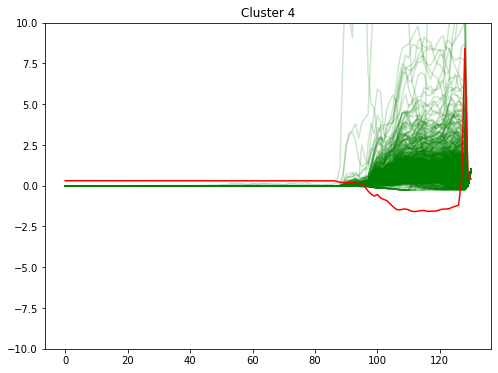

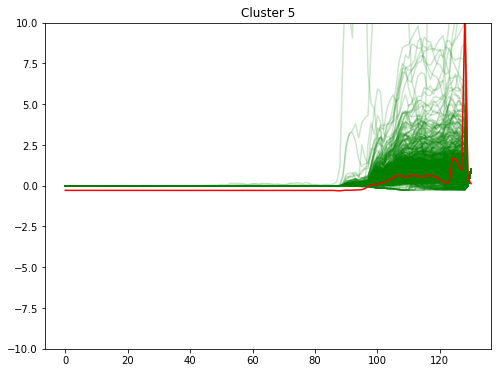

In [87]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(zeros)

score = silhouette_score(zeros, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(zeros, y_pred)

print(f'DTW SCORE {dtws}')

# zeros = zeros.to_numpy()
plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in zeros[y_pred == 1]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
    plt.show()

Resumed because of empty cluster
0.013 --> 0.013 --> 
s score -0.10741727554777175
DTW SCORE [[8.47012888]
 [9.01687854]
 [8.54815788]
 ...
 [8.4787467 ]
 [8.5120542 ]
 [8.49842925]]


<Figure size 432x288 with 0 Axes>

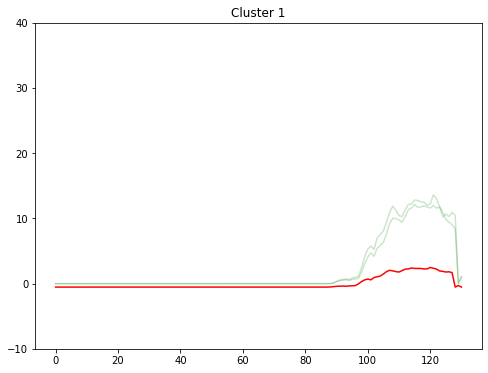

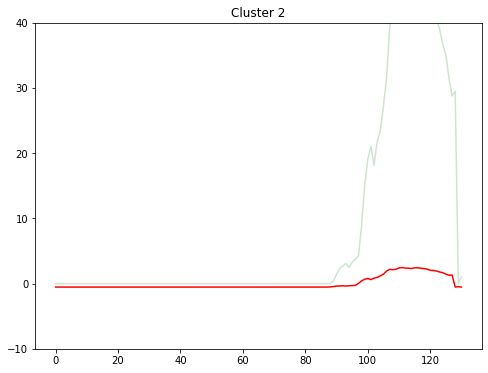

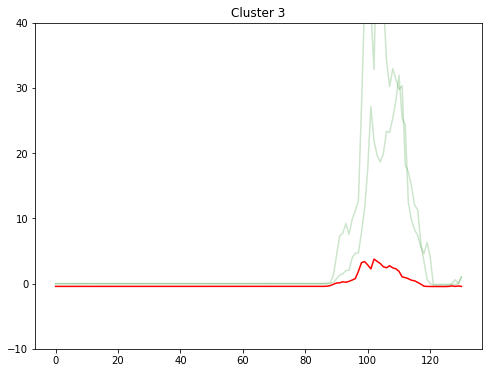

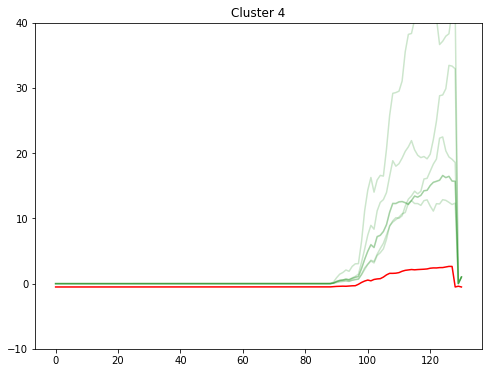

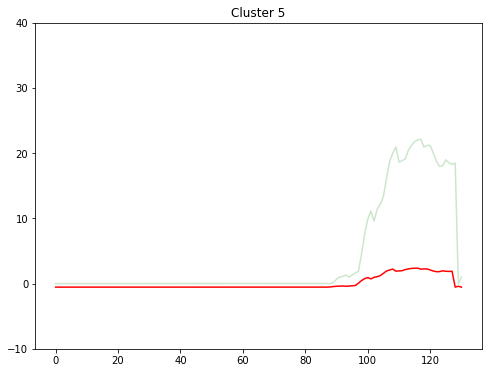

In [89]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(threes)

score = silhouette_score(threes, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(zeros, y_pred)

print(f'DTW SCORE {dtws}')

threes = threes.to_numpy()
plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in threes[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

In [67]:
df['gmm_label'] = predictions[0]

In [68]:
ones = df[df['gmm_label'] == 1]
ones = ones.drop(columns=['gmm_label'])
zeros = df[df['gmm_label'] == 0]
zeros = zeros.drop(columns=['gmm_label'])

0.046 --> 0.044 --> 0.044 --> 0.043 --> 0.043 --> 0.043 --> 0.043 --> 0.042 --> 0.042 --> 0.042 --> 0.042 --> 0.042 --> 0.042 --> 0.042 --> 0.041 --> 0.041 --> 0.041 --> 0.041 --> 0.041 --> 0.041 --> 0.040 --> 0.040 --> 0.040 --> 0.040 --> 0.040 --> 0.039 --> 0.039 --> 0.039 --> 0.039 --> 0.039 --> 0.039 --> 0.039 --> 0.038 --> 0.038 --> 0.038 --> 0.038 --> 0.038 --> 0.038 --> 0.038 --> 0.038 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.037 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.036 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.032 --> 0.032 --> 0.032 --> 0.032 --> 0.032 --> 0.032 --> 0.032 --> 0.032 --> 

<Figure size 432x288 with 0 Axes>

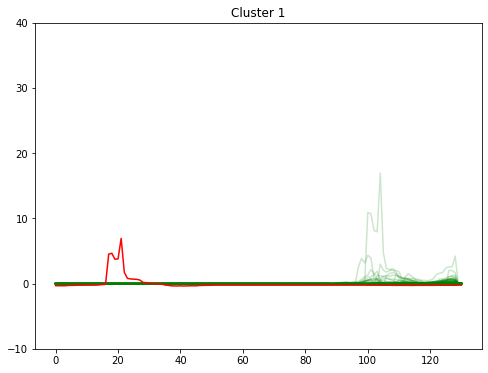

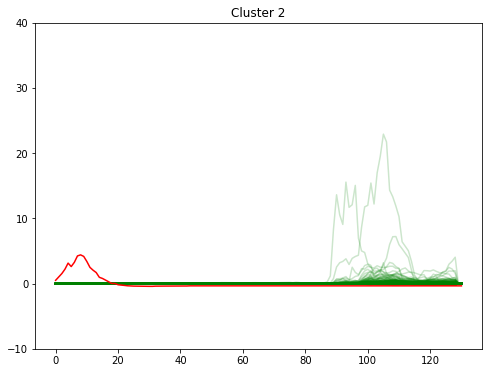

In [69]:
ks = KShape(n_clusters=10, verbose=True, random_state=0)
y_pred = ks.fit_predict(ones)

score = silhouette_score(ones, y_pred, metric="euclidean")
print(score)
ones = ones.to_numpy()
# threes = threes.to_numpy()
plt.figure()
# plt.style.use('dark_background')
for yi in range(2):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in ones[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
plt.show()

In [97]:
df['label'] = label


zeros = df[df['label'] == 0]
zeros = zeros.drop(columns=['label'])

ones = df[df['label'] == 1]
ones = ones.drop(columns=['label'])


c2 = df[df['label'] == 2]
c2 = c2.drop(columns=['label'])


c3 = df[df['label'] == 3]
c3 = c3.drop(columns=['label'])

c4 = df[df['label'] == 4]
c4 = c4.drop(columns=['label'])

c5 = df[df['label'] == 5]
c5 = c5.drop(columns=['label'])

c6 = df[df['label'] == 6]
c6 = c6.drop(columns=['label'])

c7 = df[df['label'] == 7]
c7 = c7.drop(columns=['label'])

c8 = df[df['label'] == 8]
c8 = c8.drop(columns=['label'])

c9 = df[df['label'] == 9]
c9 = c9.drop(columns=['label'])

c10 = df[df['label'] == 10]
c10 = c10.drop(columns=['label'])

c11 = df[df['label'] == 11]
c11 = c11.drop(columns=['label'])

c12 = df[df['label'] == 12]
c12 = c12.drop(columns=['label'])

c13 = df[df['label'] == 13]
c13 = c13.drop(columns=['label'])

c14 = df[df['label'] == 14]
c14 = c14.drop(columns=['label'])

c15 = df[df['label'] == 15]
c15 = c15.drop(columns=['label'])

c16 = df[df['label'] == 16]
c16 = c16.drop(columns=['label'])

c17 = df[df['label'] == 17]
c17 = c17.drop(columns=['label'])

c18 = df[df['label'] == 18]
c18 = c18.drop(columns=['label'])

c19 = df[df['label'] == 19]
c19 = c19.drop(columns=['label'])


In [98]:
print(len(zeros), '0')
print(len(ones))
print(len(c2))
print(len(c3))
print(len(c4), '4')
print(len(c5), '5')
print(len(c6), '6')
print(len(c7))
print(len(c8), '8')
print(len(c9), '9')
print(len(c10))
print(len(c11))
print(len(c12))
print(len(c13))
print(len(c14), '14')
print(len(c15))
print(len(c16), '16')
print(len(c17))
print(len(c18))
print(len(c19), '19')

2690 0
1
1
1
6 4
3377 5
499 6
1
27 8
1284 9
1
1
1
1
61 14
1
8 16
1
1
192 19


In [99]:
zeros = zeros.to_numpy()
c4 = c4.to_numpy()
c5 = c5.to_numpy()
c6 = c6.to_numpy()
c8 = c8.to_numpy()
c9 = c9.to_numpy()
c14 = c14.to_numpy()
c16 = c16.to_numpy()
c19 = c19.to_numpy()

Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
s score 0.07161716166418068
DTW SCORE [[1.35601797]
 [1.35601797]
 [1.35601797]
 ...
 [1.35601797]
 [1.35601797]
 [1.35601797]]


<Figure size 432x288 with 0 Axes>

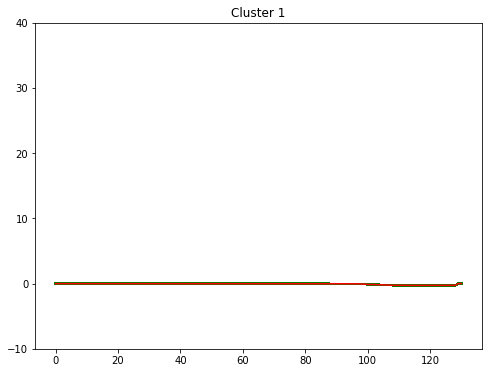

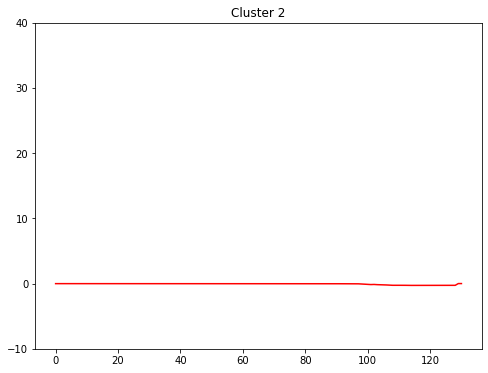

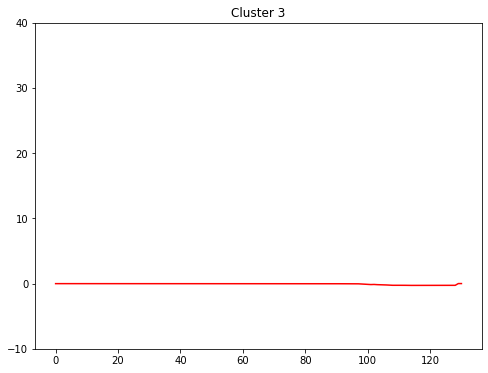

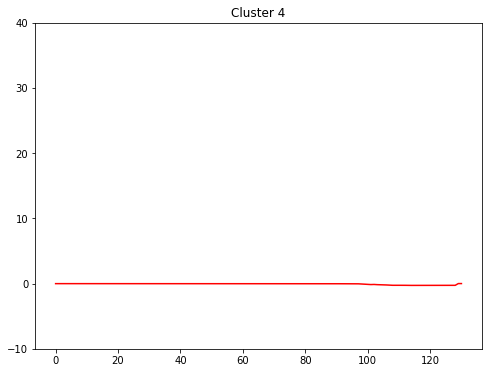

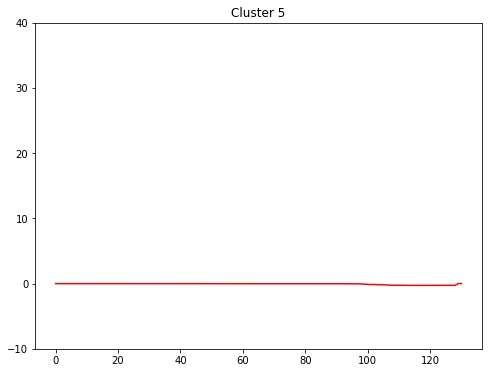

In [110]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(zeros)

# score = silhouette_score(zeros, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(zeros, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in zeros[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
0.013 --> 0.013 --> 
s score 0.3265685940265866
DTW SCORE [[37.87593891]
 [57.7533309 ]
 [49.47521426]
 [49.54057491]
 [38.38677527]
 [33.67122319]]


<Figure size 432x288 with 0 Axes>

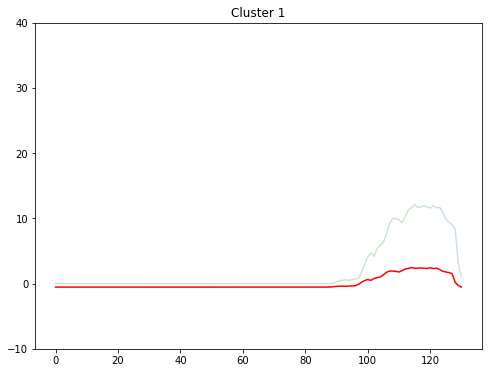

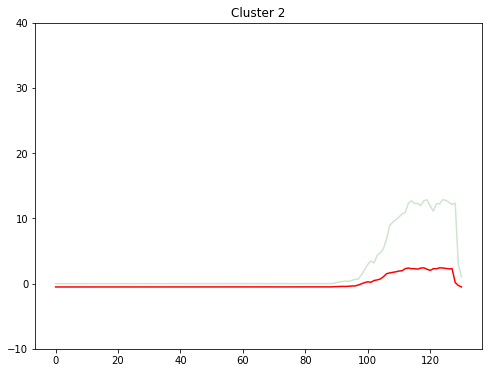

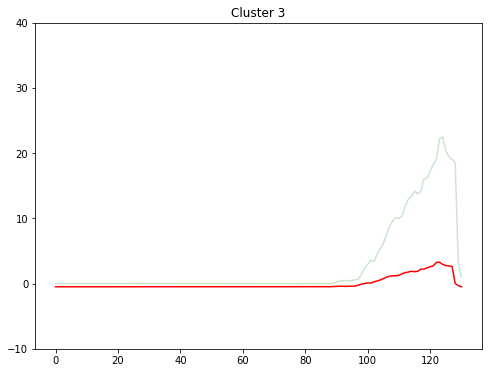

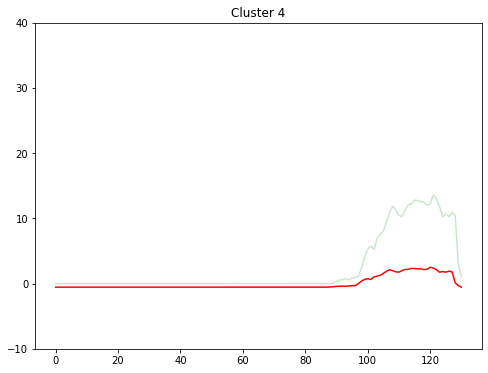

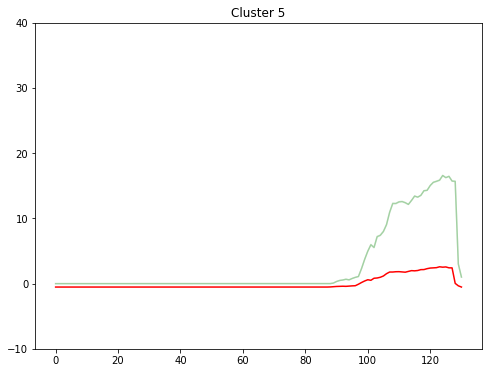

In [102]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c4)

score = silhouette_score(c4, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c4, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c4[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 

<Figure size 432x288 with 0 Axes>

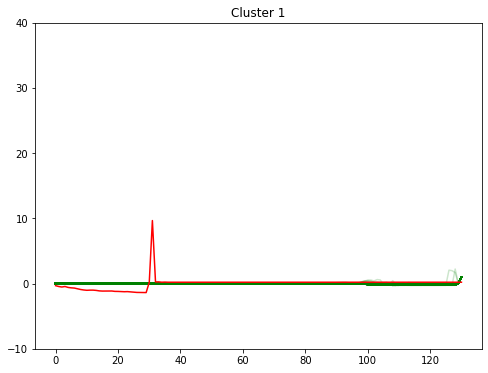

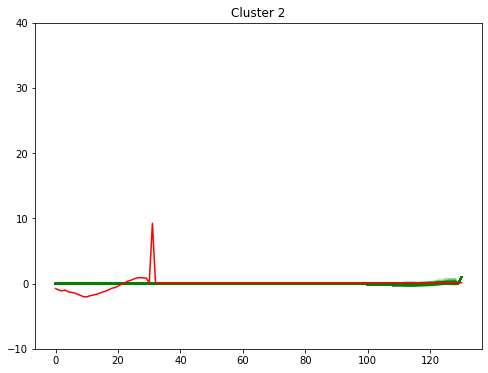

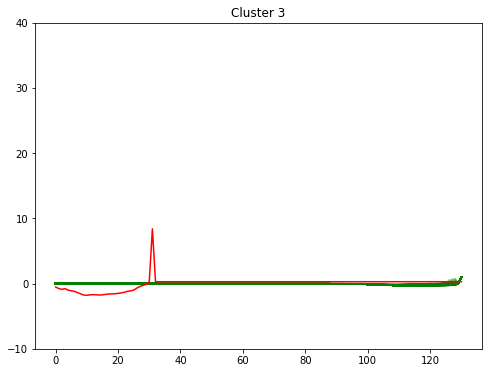

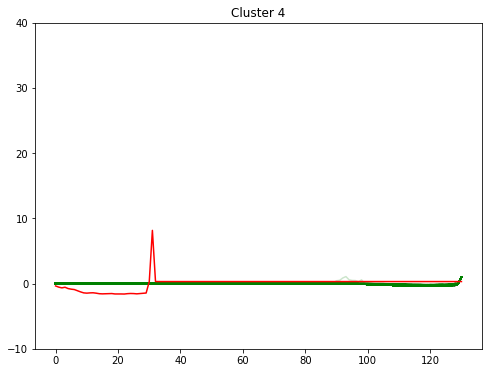

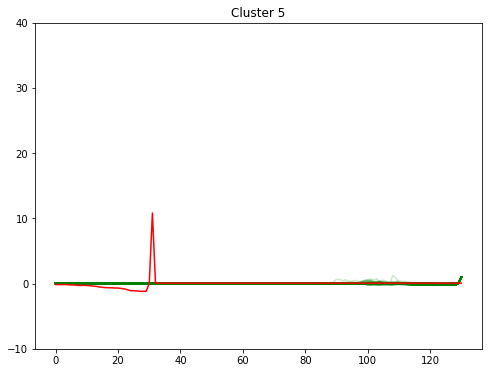

In [103]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c5)

score = silhouette_score(c5, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c5, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c5[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 
s score 0.11334041099528198
DTW SCORE [[26.93446913]
 [26.96698145]
 [26.95485077]
 [26.95214977]
 [26.95163494]
 [26.98175689]
 [25.89618068]
 [24.65647756]
 [26.95583317]
 [26.99096313]
 [26.95422331]
 [26.94965527]
 [26.9789114 ]
 [27.00023876]
 [26.98358452]
 [26.94983118]
 [25.33163956]
 [26.94161677]
 [26.59354228]
 [26.99241425]
 [26.97193037]
 [26.18241359]
 [26.60199074]
 [25.75209896]
 [26.9439824 ]
 [24.14784143]
 [23.85180402]
 [27.01135595]
 [26.94713031]
 [26.96338805]
 [26.96521394]
 [26.97098357]
 [24.42017784]
 [26.94742738]
 [23.96405082]
 [26.97933771]
 [26.95498922]
 [27.0020964 ]
 [26.96337275]
 [27.00428031]
 [26.9603276 ]
 [26.95894766]
 [26.14222614]
 [25.84007208]
 [26.95470264]
 [26.98984497]
 [25.50099528]
 [25.37313331]
 [26.95270783]
 [26.97105   ]
 [26.96404618]
 [25.6094922 ]
 [23.86034746]
 [24.8627661 ]
 [26.97509079]
 [24.43134423]
 [26.97003649]
 [26.96835478]
 [26.97319347]
 [26.96682911]
 [26.913227

<Figure size 432x288 with 0 Axes>

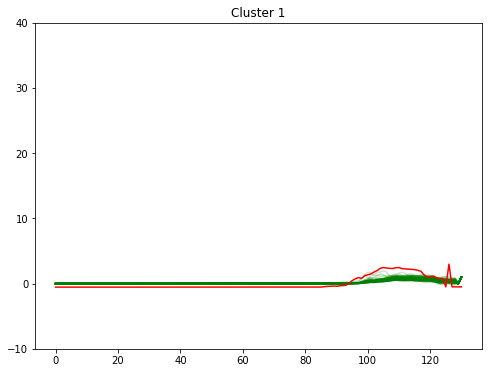

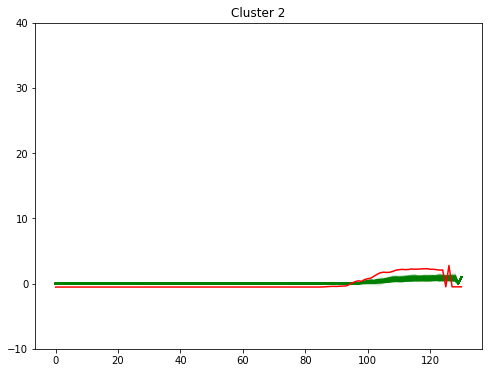

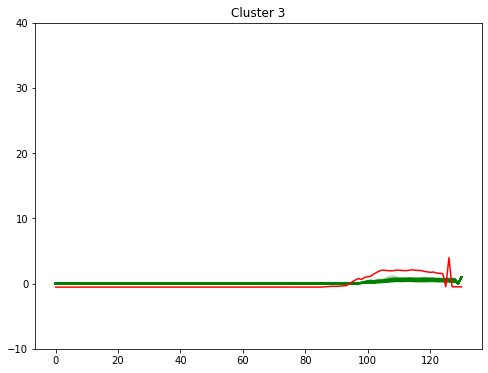

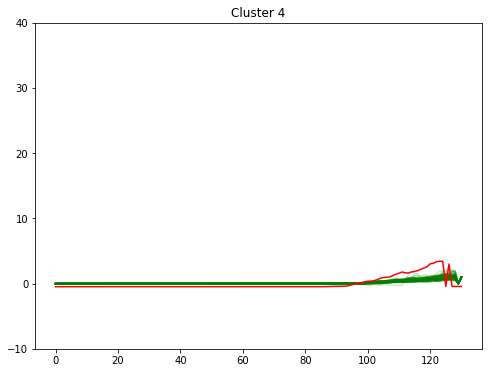

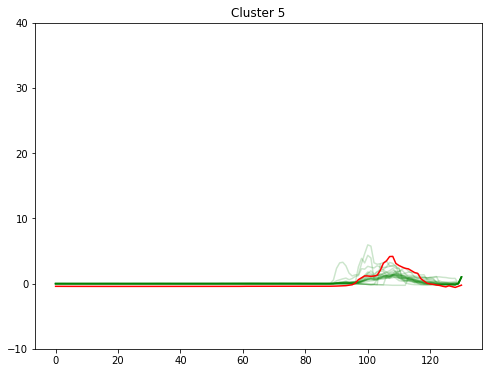

In [104]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c6)

score = silhouette_score(c6, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c6, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c6[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.013 --> 0.013 --> 0.013 --> 0.013 --> 0.013 --> 
s score 0.09235280419198057
DTW SCORE [[ 8.36384175]
 [ 7.6196881 ]
 [ 8.77297423]
 [ 9.83886483]
 [ 8.48328843]
 [ 8.86830711]
 [10.14716474]
 [ 7.93734572]
 [ 8.61194761]
 [ 8.37218093]
 [ 7.74932761]
 [ 7.870907  ]
 [ 8.13946741]
 [ 8.96939872]
 [ 8.43820974]
 [ 8.37732973]
 [ 8.00452064]
 [ 8.2656566 ]
 [ 8.3063487 ]
 [10.35432908]
 [ 8.2335042 ]
 [11.44258777]
 [15.83885973]
 [10.06448217]
 [ 8.17628048]
 [ 8.41476938]
 [ 8.01619162]]


<Figure size 432x288 with 0 Axes>

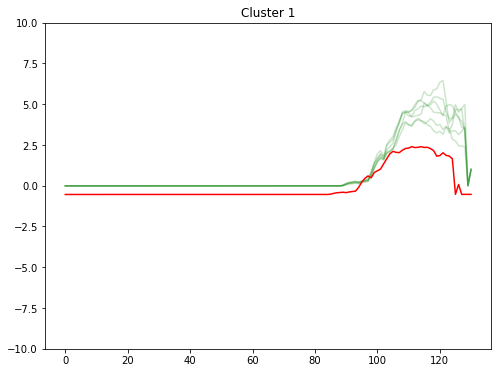

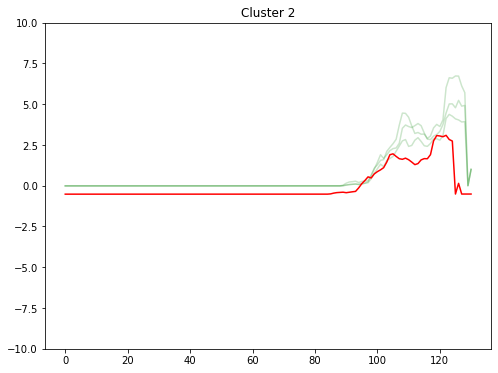

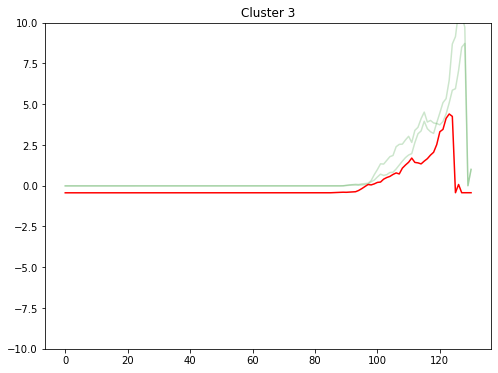

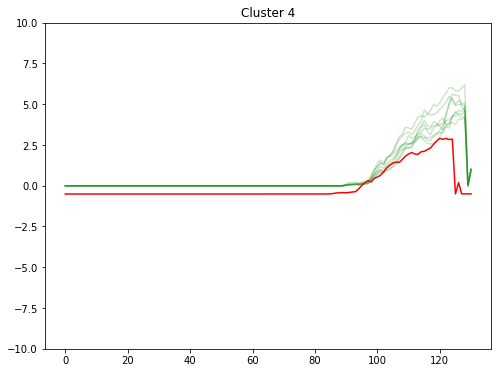

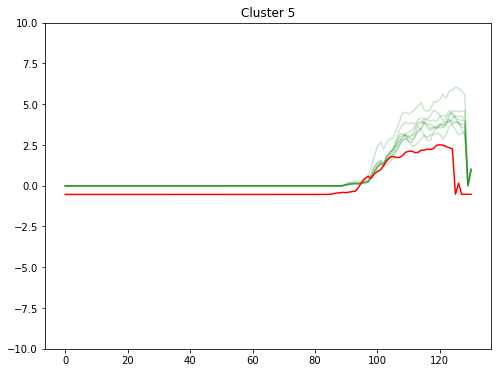

In [112]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c8)

score = silhouette_score(c8, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c8, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c8[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.012 --> 0.011 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.009 --> 0.009 --> 
s score 0.1776550618135315
DTW SCORE [[71.23816641]
 [71.2492465 ]
 [71.24268155]
 ...
 [71.23675761]
 [71.23687571]
 [71.23934563]]


<Figure size 432x288 with 0 Axes>

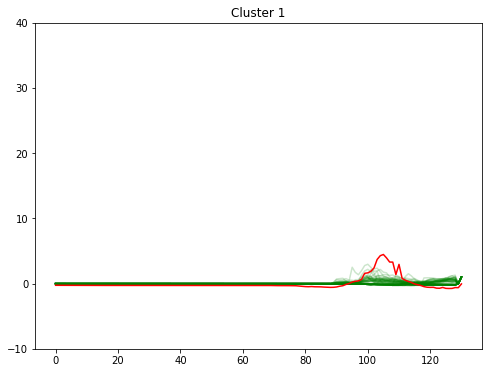

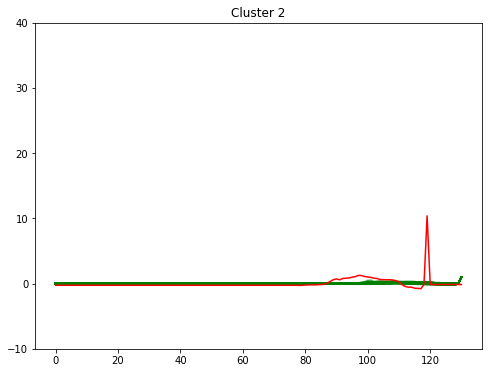

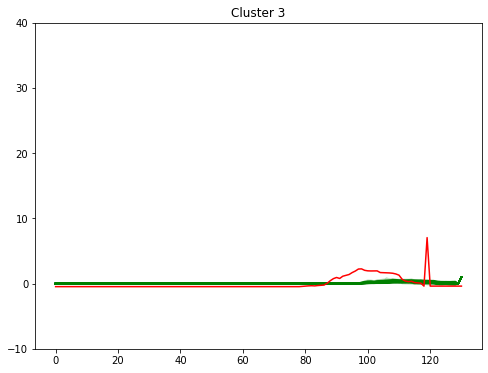

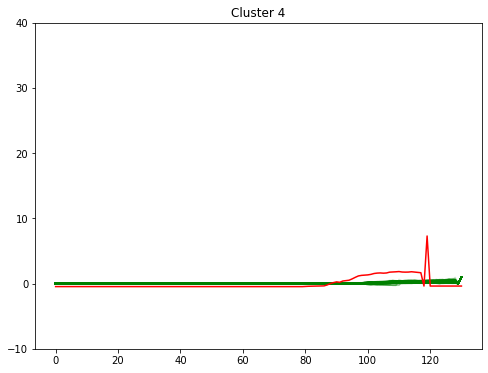

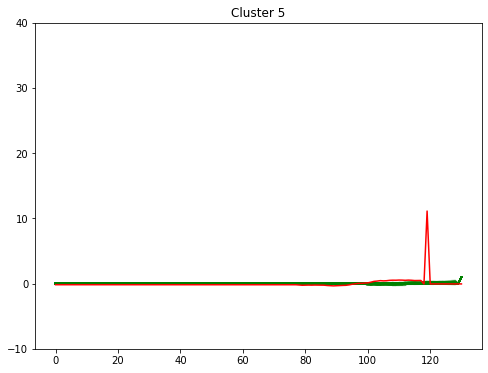

In [106]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c9)

score = silhouette_score(c9, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c9, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c9[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.014 --> 0.014 --> 0.014 --> 0.014 --> 
s score 0.0325757229843935
DTW SCORE [[11.05516646]
 [12.32027566]
 [11.33757168]
 [12.01255441]
 [12.14265233]
 [12.49060487]
 [12.2462403 ]
 [12.2481611 ]
 [12.51616062]
 [12.6765207 ]
 [11.50179045]
 [12.15940168]
 [12.07731359]
 [11.8539689 ]
 [12.07797349]
 [12.01248989]
 [12.6427314 ]
 [12.54113027]
 [12.16149559]
 [20.8693376 ]
 [12.16827753]
 [12.42875291]
 [11.91102429]
 [12.37189569]
 [12.1052579 ]
 [11.48307963]
 [12.11063392]
 [12.54150615]
 [12.16669079]
 [11.99717738]
 [11.46913164]
 [12.32141255]
 [13.03181002]
 [12.54744971]
 [11.8701205 ]
 [12.45893061]
 [12.41337785]
 [12.6014631 ]
 [12.3772509 ]
 [11.97612209]
 [11.90906091]
 [12.31656136]
 [11.87953271]
 [11.74581682]
 [11.8020713 ]
 [12.01827837]
 [12.38037699]
 [11.63870589]
 [11.82240729]
 [12.21983445]
 [11.71312109]
 [12.44735755]
 [12.45126729]
 [12.01752843]
 [11.98791534]
 [12.34889228]
 [11.60881981]
 [12.09915343]
 [12.21345692]
 [11.97408236]
 [12.12058843]]


<Figure size 432x288 with 0 Axes>

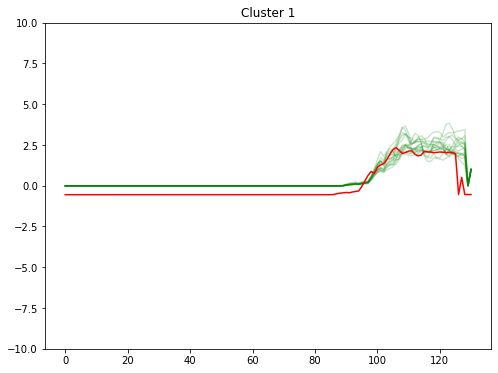

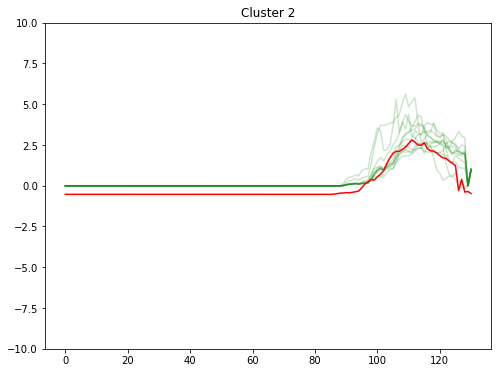

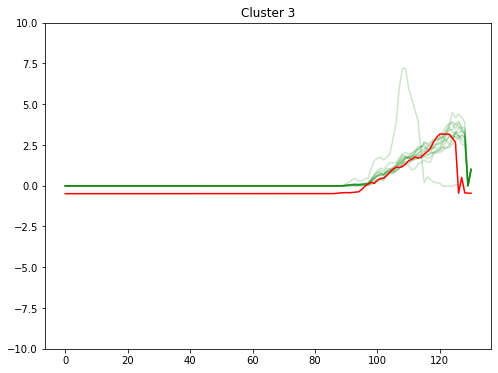

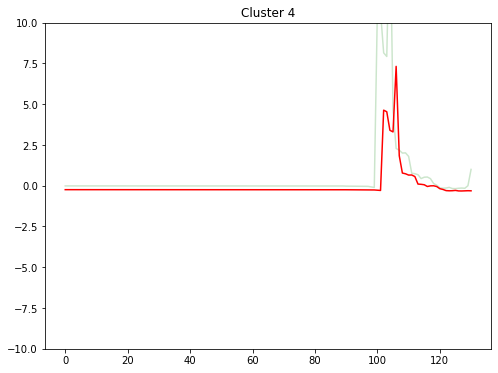

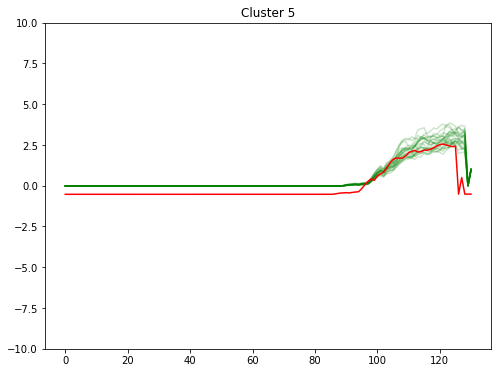

In [111]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c14)

score = silhouette_score(c14, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c14, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c14[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.012 --> 0.012 --> 
s score -0.03521545111005393
DTW SCORE [[20.1190569 ]
 [25.29962793]
 [12.52466169]
 [13.00633177]
 [17.8941898 ]
 [20.3291361 ]
 [16.03437937]
 [15.85876836]]


<Figure size 432x288 with 0 Axes>

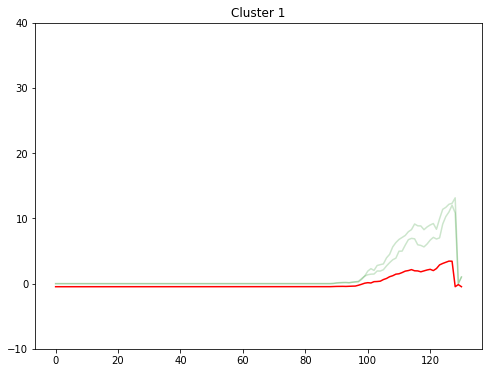

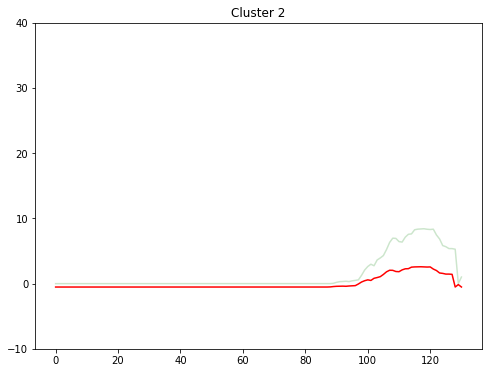

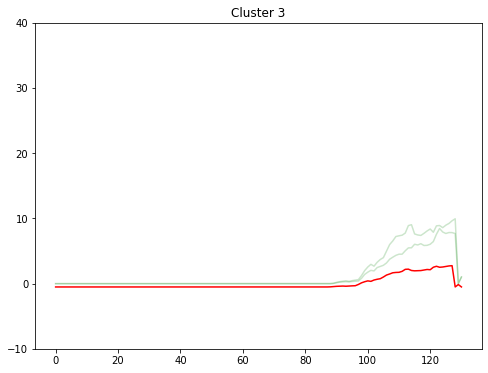

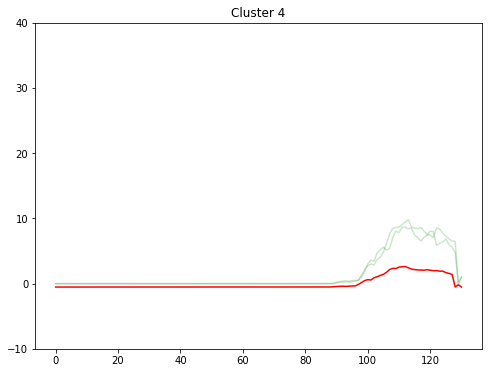

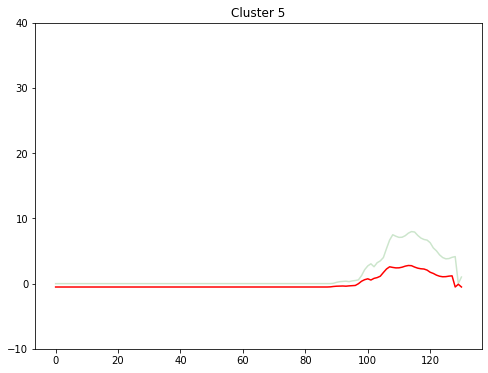

In [108]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c16)

score = silhouette_score(c16, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c16, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c16[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()

0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 
s score 0.07161716166418068
DTW SCORE [[23.94531959]
 [22.48904663]
 [23.72939691]
 [22.34604534]
 [23.93342514]
 [22.29487072]
 [24.06288042]
 [22.49240899]
 [23.65715284]
 [22.32821552]
 [24.58714651]
 [23.0603108 ]
 [22.42837624]
 [24.87647286]
 [25.82867794]
 [22.20344759]
 [24.14643648]
 [22.18473816]
 [23.8527077 ]
 [25.94626838]
 [22.27707759]
 [25.68939022]
 [23.16135616]
 [25.19177493]
 [24.37043568]
 [23.62411113]
 [23.21596659]
 [24.77874827]
 [24.76713144]
 [24.34858338]
 [22.33332929]
 [22.38704472]
 [22.26479373]
 [22.79265857]
 [24.41646339]
 [22.31063947]
 [22.75213759]
 [22.50374868]
 [24.45993119]
 [23.79410963]
 [22.44255226]
 [22.61840166]
 [22.56679372]
 [23.61544958]
 [22.70584196]
 [24.23543085]
 [22.9700776 ]
 [25.29678203]
 [23.7761101 ]
 [22.42959553]
 [24.09165436]
 [23.56207019]
 [25.9885571 ]
 [22.65527177]
 [22.30377284]
 [22.18498305]
 [22.728004

<Figure size 432x288 with 0 Axes>

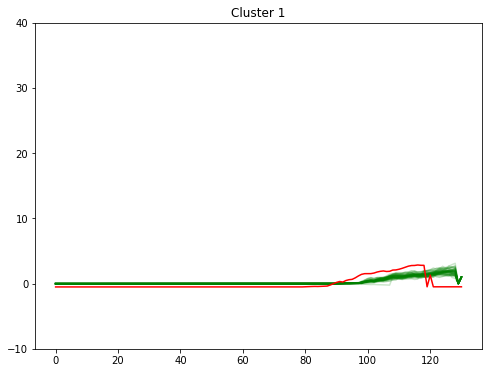

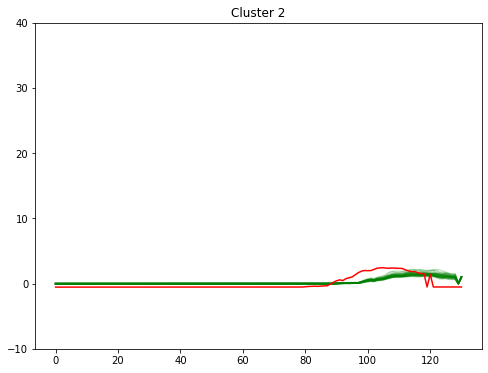

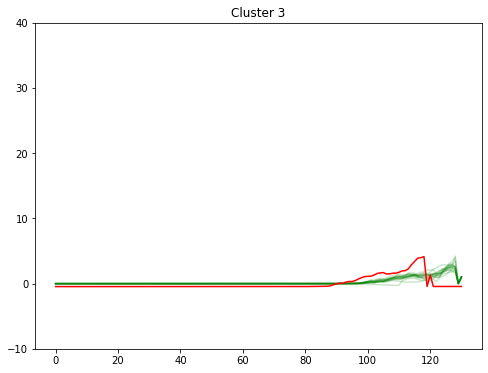

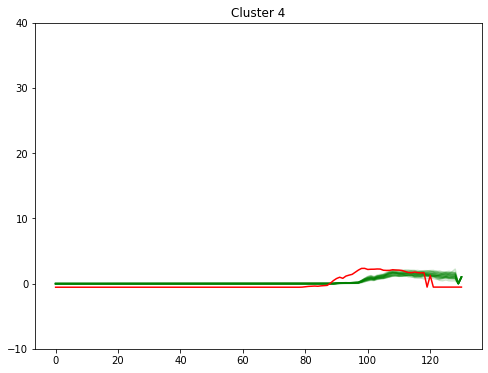

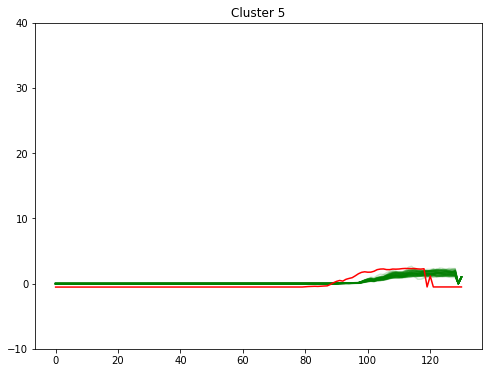

In [109]:
ks = KShape(n_clusters=5, verbose=True, random_state=0)
y_pred = ks.fit_predict(c19)

score = silhouette_score(c19, y_pred, metric="euclidean")

print(f's score {score}')

dtws = dtw_score(c19, y_pred)

print(f'DTW SCORE {dtws}')


plt.figure()
# plt.style.use('dark_background')
for yi in range(5):
    plt.figure(figsize=(8, 6))
#     plt.subplot(3, 1, 1 + yi)
    for xx in c19[y_pred == yi]:
        plt.plot(xx.ravel(), alpha=.2,color='green')
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-10, 40)
    plt.title("Cluster %d" % (yi + 1))
#     plt.yscale('log')

# plt.tight_layout()
plt.show()